## TRABAJO GRUPAL  : "Regresiones Avanzadas"

### Grupo 7
### Integrantes: María del Pilar Arias, María Jara, Germán May, Florencia Varise


### 1- CONSIGNA
Construcción de un Modelo de Regresión Lineal Múltiple a partir de la base de datos "CarPrices.csv"

### 2- DESARROLLO
En primer lugar se importan las librerías necesarias

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools.summarytools import dfSummary
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.feature_selection import RFE
from statsmodels.graphics import utils


Se realiza la Importación y lectura de la base de datos con inspección de los primeros registros 
La base contiene 26 variables y 205 registros


In [3]:
df = pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

###  2.1. ¿Cuál podría ser a su criterio la variable dependiente para pensar en un modelo de regresión lineal múltiple? Justifique

Para la construcción de un modelo de regresión lineal múltiple , la variable dependiente debe ser cuantitativa. En la base de datos contamos con las siguientes variables cuantitativas: 
Symboling o clasificación de riesgo de seguro asignada; algunas características del coche como wheelbase (Base del coche), carlength (Longitud) , carwidth(Ancho), carheight (altura), curbweight (peso de un coche sin ocupantes ni equipaje), enginesize(tamaño del coche ), boreratio, stroke(carrera o volumen dentro del motor), compressionratio(Relación de compresión del coche) , horsepower (Caballos de fuerza), peakrpm (RPM máximo del coche), citympg (Kilometraje en la ciudad ), highwaympg( Kilometraje en carretera) y price ( precio). 
Decidimos tomar como variable dependiente a predecir el precio del vehiculo ya que consideramos que es la de mayor interes general. En caso de una concesionaria, puede ser de utilidad para predecir el precio al que se debería vender un auto. También en caso de un particular podemos tomarlo como parámetro si deseamos estimar el precio de compra/venta del mismo. 

###  2.2. Generen información exploratoria de la variable dependiente elegida, y algunas relaciones con al menos tres columnas.

### Análisis Exploratorio

### * Variable Dependiente
Construímos un histograma para visualizar la distribución de la variable dependiente elegida: price
Observamos que se trata de una distribución sesgada hacia la derecha.

Construímos una tabla que muestra la estadística descriptiva de las distintas variables que conforman la base de datos 
En ella observamos que la media de la variable price es 13276.7 , ds 7988.9; su mediana es 10295 (RIC 8715)

<AxesSubplot:xlabel='price', ylabel='Count'>

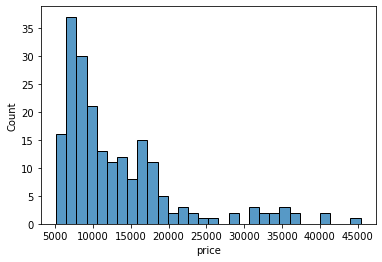

In [5]:
sns.histplot(data=df, x="price", bins=30)

In [6]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,car_ID[int64],Mean (sd) : 103.0 (59.3)min < med < max:1.0 < 103.0 < 205.0IQR (CV) : 102.0 (1.7),205 distinct values,,0(0.0%)
2,symboling[int64],1. 02. 13. 24. 35. -16. -2,67 (32.7%)54 (26.3%)32 (15.6%)27 (13.2%)22 (10.7%)3 (1.5%),,0(0.0%)
3,CarName[object],1. toyota corona2. peugeot 5043. toyota corolla4. subaru dl5. mazda 6266. mitsubishi outlander7. mitsubishi mirage g48. honda civic9. mitsubishi g410. toyota mark ii11. other,6 (2.9%)6 (2.9%)6 (2.9%)4 (2.0%)3 (1.5%)3 (1.5%)3 (1.5%)3 (1.5%)3 (1.5%)3 (1.5%)165 (80.5%),,0(0.0%)
4,fueltype[object],1. gas2. diesel,185 (90.2%)20 (9.8%),,0(0.0%)
5,aspiration[object],1. std2. turbo,168 (82.0%)37 (18.0%),,0(0.0%)
6,doornumber[object],1. four2. two,115 (56.1%)90 (43.9%),,0(0.0%)
7,carbody[object],1. sedan2. hatchback3. wagon4. hardtop5. convertible,96 (46.8%)70 (34.1%)25 (12.2%)8 (3.9%)6 (2.9%),,0(0.0%)
8,drivewheel[object],1. fwd2. rwd3. 4wd,120 (58.5%)76 (37.1%)9 (4.4%),,0(0.0%)
9,enginelocation[object],1. front2. rear,202 (98.5%)3 (1.5%),,0(0.0%)
10,wheelbase[float64],Mean (sd) : 98.8 (6.0)min < med < max:86.6 < 97.0 < 120.9IQR (CV) : 7.9 (16.4),53 distinct values,,0(0.0%)


In [7]:
df.symboling = df.symboling.astype('object')

### * Relación entre la variable dependiente price  y otras variables
###   Variables categóricas

Construímos boxplots para explorar a la asociación de la variable outcome price con distintas variables predictoras categóricas


#### Variable Carbody o carrocería 

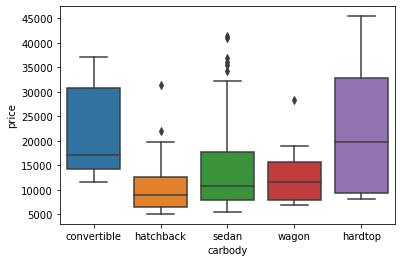

In [8]:
ax = sns.boxplot(x="carbody", y="price", data=df)

Los boxplot comparativos de la asociación entre el precio de los coches y el tipo de carrocería muestra que aquellos con carroceria hatchback tienen menor precio , mientras que aquellos con tipo de carroceria hardtop y convertible presentan los mayores precios de acuerdo a su mediana. Los automoviles cuyo tipo de carrocería es hatchback, sedan y wagon presentan algunos valores outliers , a más de 1.5 RIC en especial tipo sedan


#### Variable Fueltype

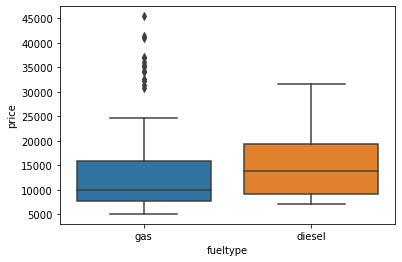

In [9]:
ax = sns.boxplot(x="fueltype", y="price", data=df)

Observamos que la mediana de precio de los autos con fueltype ( tipo de combustible) gas es menor que aquellos cuyo tipo de combustible es diesel. En el caso de los autos a gas, observamos varios valores de precio outliers, cuyo valor se encuentra a más de 1.5 RIC

#### Variable Doornumber, número de puertas 

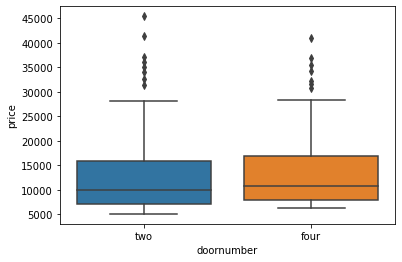

In [10]:
ax = sns.boxplot(x="doornumber", y="price", data=df)

No impresiona observarse diferencias de precio entre el número de puertas de los automóviles y su precio

### Relación de la variable dependiente price , con otras variables
### Variables numéricas


Construímos gráficos de dispersión para evaluar dicha asociación cuando las variables predictores eran cuantitativas

#### Variable Horsepower, caballos de fuerza

Text(0.5, 1.0, 'Horsepower')

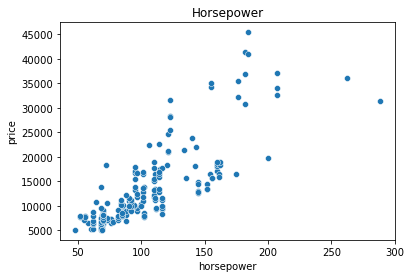

In [11]:
sns.scatterplot(data=df, x="horsepower", y="price").set_title('Horsepower')

En el gráfico anterior observamos que a medida aumentan los caballos de fuerza del automóvil , incrementa su precio. En niveles superiores de caballos de fuerza , la dispersion de precios es mayor.

#### Variable Carlengh, longitud del coche

Text(0.5, 1.0, 'Car length')

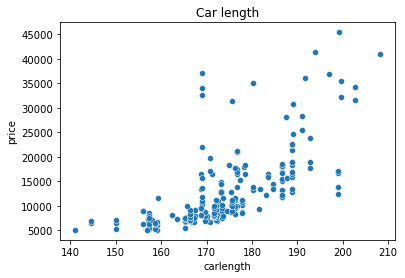

In [12]:
sns.scatterplot(data=df, x="carlength", y="price").set_title('Car length')

De la misma forma, en el gráfico observamos que a medida que aumenta la longitud de un automovil también se incrementa su precio, aunque también se observa una importante dispersión ya que para los mismos valores de carlenght hay muchos valores posibles de price

#### Variable Highwaympg, kilometraje en carretera.

Text(0.5, 1.0, 'Highway MPG')

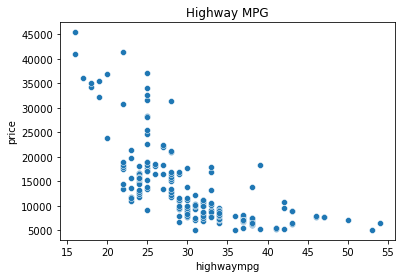

In [13]:
sns.scatterplot(data=df, x="highwaympg", y="price").set_title('Highway MPG')

De acuerdo a este gráfico , a medida que se incrementa el kilometraje en carretera, el precio del coche disminuye.

### Evaluación de la presencia de Correlación  entre variables

Para evaluar la presencia de correlación entre variables numéricas , construímos una nueva base en la que seleccionamos sólo las variables cuantitativas; exploramos los primeros 5 registros y decidimos excluir la variable car_ID ya que no la consideramos de interés para análisis ´por la gran cantidad de registros con valores distintos.
La base df_num consta de 14 variables y 205 registros.

In [14]:
df_num = df.select_dtypes(include=['float64', 'int'])

In [15]:
df_num.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
df_num.drop(columns='car_ID') 

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


Construímos una matriz de correlación , en la que se visualizan los valores con mayor correlación positiva ( cercanos a 1) con tonalidad azul y aquellos con mayor correlación negativa con valores amarillos claros.

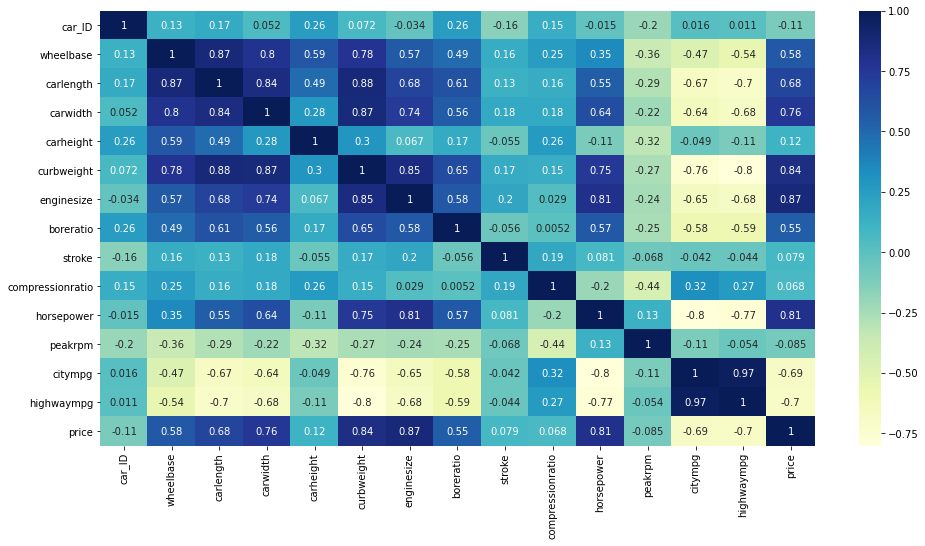

In [17]:

# Matriz de correlacion 
cor = df_num.corr()

# tamaño de la figura
plt.figure(figsize=(16,8))

# mapa de calor
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

El análisis de la matriz de correlación muestra que las variables con mayor correlación positiva con la variable dependiente price  son:  enginesize (0.87), curbweight(0.84) , horsepower (0.81) y carwidth (0.76). Estas variables representan caracteristicas del automóvil como su  tamaño, su peso sin ocupantes, los caballos de fuerza y el ancho del coche.  
Por otra parte, se relacionan de forma negativa con el precio : highwaympg (-0.69) y citympg (-0.7) , que representan el kilometraje en carretera y en la ciudad . 

Observamos también que las siguientes variables predictoras presentan alta correlación positiva entre si ( mayor a 0.8):  carlenght y wheelbase (0.87),  carwidth y wheelbase (0.8),  carlenght y carwidht (0.84), carlenght y curbweight (0.88), carwidth y curbweight (0.87), curbweight y carlenght(0.88),curbweight y enginesize(0.85), enginesize y horsepower(0.81)
Estas variables pueden generar la presencia de colinealidad en el modelo


### Exploración gráfica de la asociación entre variables continuas 
A continuación realizamos gráficos de dispersión que muestran la asociación entre cada una de las variables continuas de la base de datos e histogramas de las mismas. En los gráficos de dispersión puede comprobarse la relación entre algunas variables que mencionamos previamente  y que presentaban altos valores de correlación. Asimismo, de acuerdo a los histogramas, las siguientes variables presentan distribución cercana a la normalidad: carlength, carheight, boreratio, stroke, peakrpm y citmpg, mientras que las siguientes presentan una distribución sesgada a la izquierda: wheelbase, carwidth, curbweight, enginesize, compressionratio y horsepower.

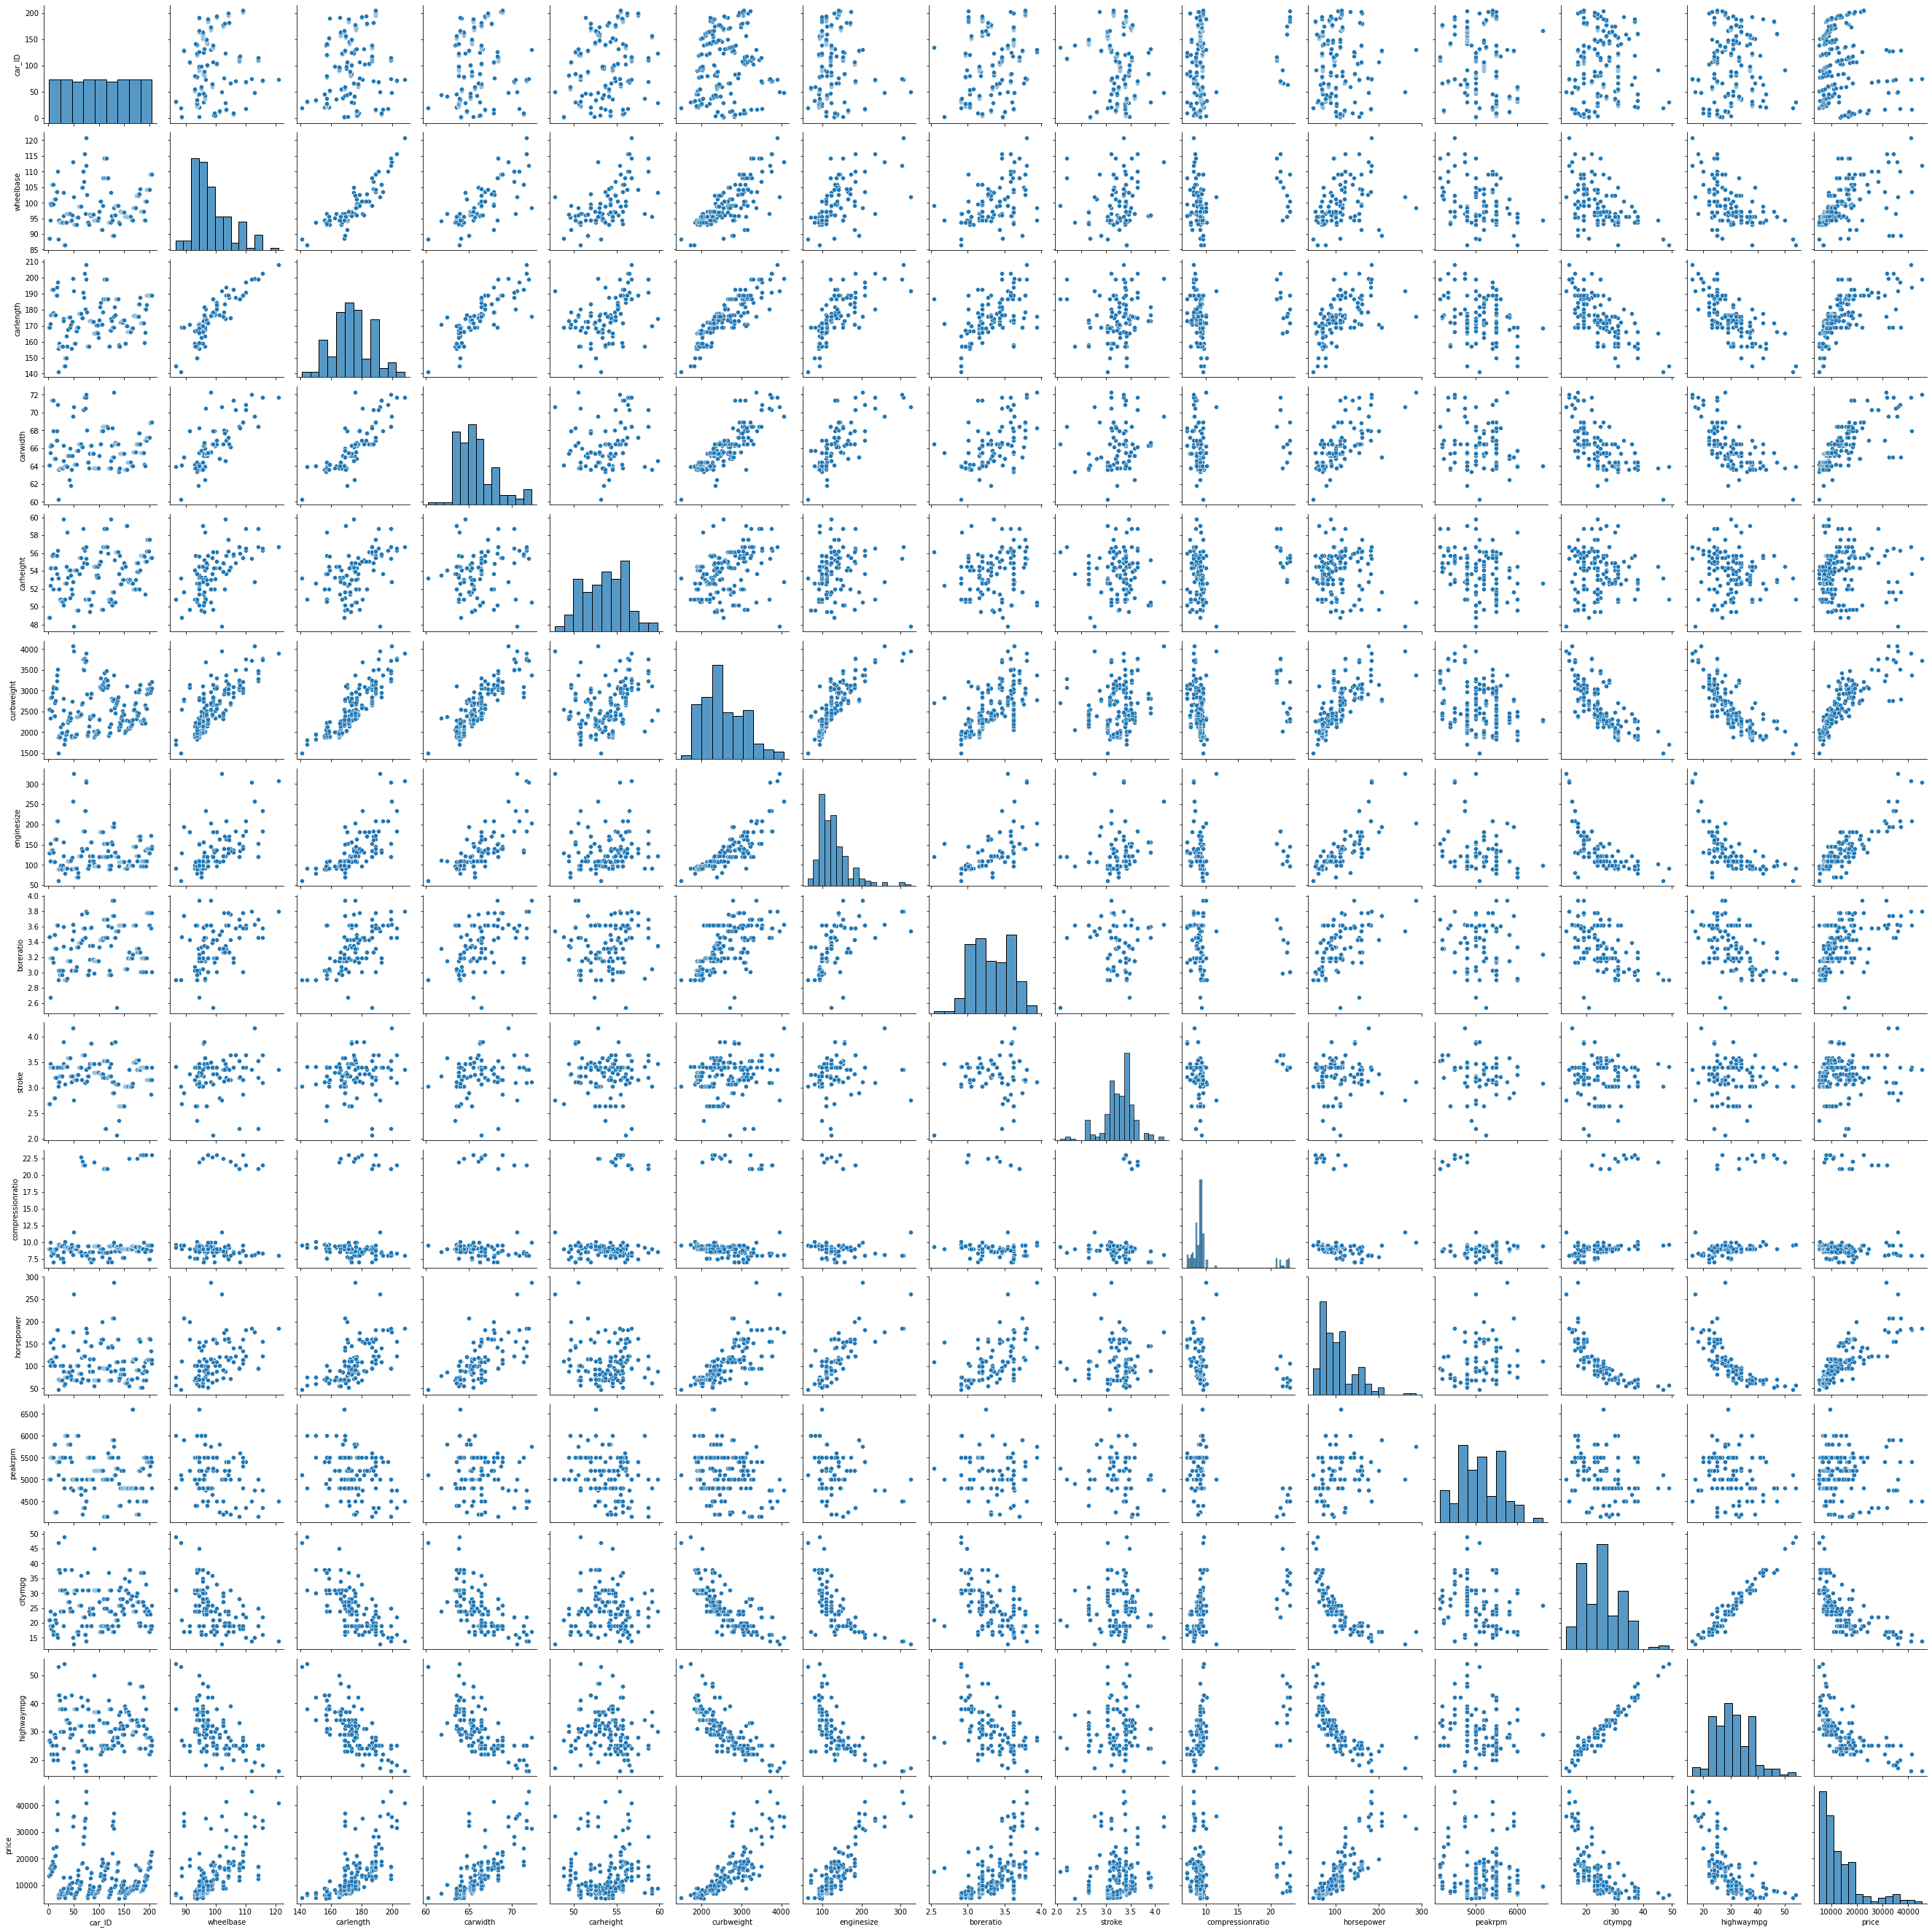

In [18]:
g = sns.pairplot(df_num, diag_kind="hist") 
g

In [19]:
columnas = [ 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']

### Exploración gráfica de la asociación entre variables predictoras continuas y variable price 
Construímos gráficos de dispersión para visualizar la relación entre variables predictoras continuas y la variable dependiente price
Observamos que las variables que muestran mayor relación lineal positiva son: curbweight, enginesize y horsepower. A su vez, citympg y highwaympg parecerían tener con el precio una relación negativa no lineal. Para el resto de las variables, la relación es mucho más difusa o inexistente.


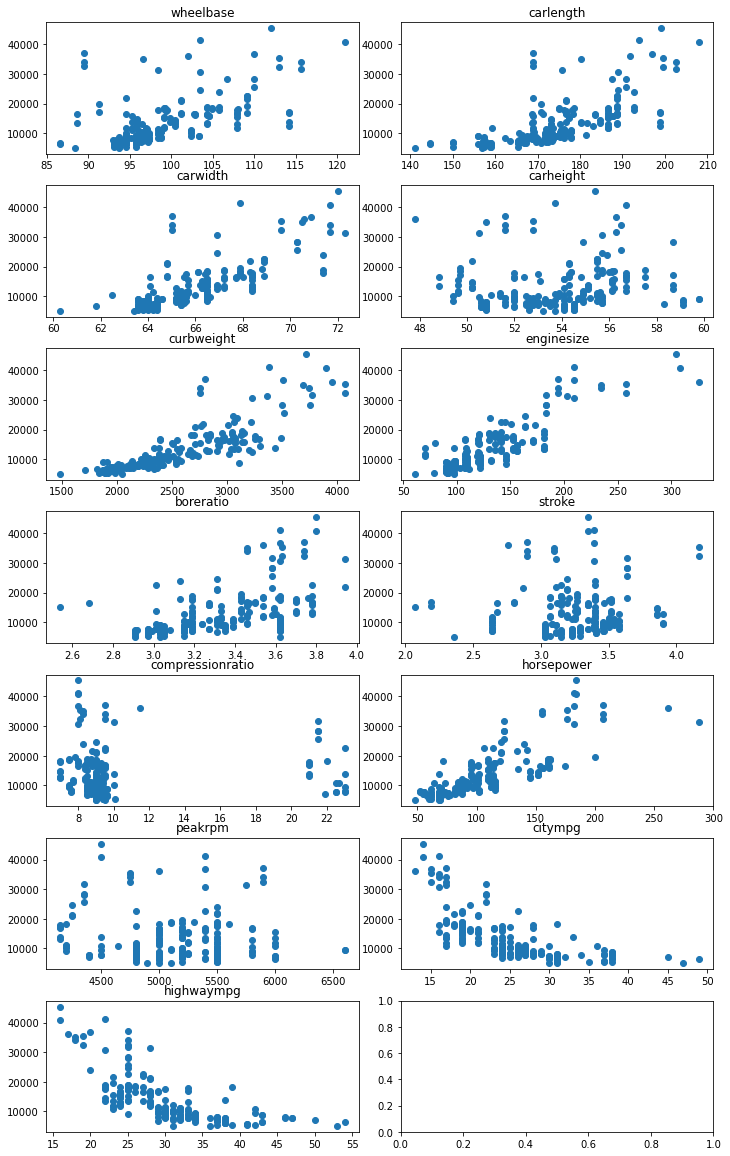

In [20]:

fig, ax = plt.subplots(7, 2, figsize = (10, 16))
fig.tight_layout() 

ax[0][0].plot( df[columnas[0]],df['price'], 'o')
ax[0][0].set_title(columnas[0])

ax[0][1].plot( df[columnas[1]],df['price'], 'o')
ax[0][1].set_title(columnas[1])

ax[1][0].plot( df[columnas[2]],df['price'], 'o')
ax[1][0].set_title(columnas[2])

ax[1][1].plot( df[columnas[3]],df['price'], 'o')
ax[1][1].set_title(columnas[3])

ax[2][0].plot( df[columnas[4]],df['price'], 'o')
ax[2][0].set_title(columnas[4])

ax[2][1].plot( df[columnas[5]],df['price'], 'o')
ax[2][1].set_title(columnas[5])

ax[3][0].plot( df[columnas[6]],df['price'], 'o')
ax[3][0].set_title(columnas[6])

ax[3][1].plot( df[columnas[7]],df['price'], 'o')
ax[3][1].set_title(columnas[7])

ax[4][0].plot( df[columnas[8]],df['price'], 'o')
ax[4][0].set_title(columnas[8])

ax[4][1].plot( df[columnas[9]],df['price'], 'o')
ax[4][1].set_title(columnas[9])

ax[5][0].plot( df[columnas[10]],df['price'], 'o')
ax[5][0].set_title(columnas[10])

ax[5][1].plot( df[columnas[11]],df['price'], 'o')
ax[5][1].set_title(columnas[11])

ax[6][0].plot( df[columnas[12]],df['price'], 'o')
ax[6][0].set_title(columnas[12])

plt.show()

###  Limpieza de Datos- Construcción de nuevas variables

A los fines de la interpretación del modelo , dado que la variable CarName tiene gran cantidad de valores diferentes , construímos una nueva variable que llamamos CarBrand en la que consideramos sólo la marca del auto y no su modelo; ej alfa-romero guilia , stelvio , Quadrifoglio , se consideran como alfa-romero
Reemplazo la variable CarName por la nueva variable CarBrand
También se detectan algunos valores mal escritos , ej Toyouta en vez de Toyota o distinta denominación para la misma marca
ej vw en vez de vokswagen

In [21]:
# Se agrega una nueva variable que es la marca del auto
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(" ")[0])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [22]:
df.drop(columns=['car_ID','CarName'],inplace=True)

In [23]:
#En la inspección se observan valores distintos y  algunos mal escritos
df.CarBrand.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
renault         2
maxda           2
Nissan          1
vokswagen       1
toyouta         1
mercury         1
porcshce        1
Name: CarBrand, dtype: int64

In [24]:
#Reemplazo los valores mal
df.loc[(df['CarBrand'] == "vw") | 
         (df['CarBrand'] == "vokswagen")
         , 'CarBrand'] = 'volkswagen'

df.loc[df['CarBrand'] == "porcshce", 'CarBrand'] = 'porsche'

df.loc[df['CarBrand'] == "toyouta", 'CarBrand'] = 'toyota'

df.loc[df['CarBrand'] == "Nissan", 'CarBrand'] = 'nissan'

df.loc[df['CarBrand'] == "maxda", 'CarBrand'] = 'mazda'

In [25]:
df.CarBrand.value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: CarBrand, dtype: int64

### Preparación de los datos para la construcción del modelo

In [26]:
df.shape # Observamos la forma de los datos

(205, 25)

In [27]:
y = df.loc[:,'price']
x = df.loc[:,df.columns != 'price'] # Separamos  la variable target de las variable predictoras

In [28]:
x.shape 

(205, 24)

In [29]:
y.shape

(205,)

In [30]:
# Se convierten las variables categóricas a dummies para poder utilizarlas en el modelo de regresión
x_obj = x.select_dtypes(include=['object'])
x_obj_cols = x_obj.columns
x_obj_cols

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'CarBrand'],
      dtype='object')

In [31]:
x=pd.get_dummies(x, columns=x_obj_cols)

In [32]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler().fit_transform(x)
#scale = pd.DataFrame(scaler,columns = x.columns)

In [33]:
x.shape 

(205, 79)

In [34]:
#dfSummary(x_scale)

###  Modelado 

### 2.3-Prueben y generen al menos 3 modelos de regresión lineal múltiple con la variable dependiente elegida. (con variables cuantitativas y cualitativas).
### 2.4. Chequeen supuestos para los 3 modelos pedidos

Se construirán los modelos con el método de mínimos cuadrados

In [35]:
# Se divide la base de datos en set de  entrenamiento (70%) y set de testeo (30%)
# De esta forma la base de entrenamiento tiene 143 registros y test 62.

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size = 0.3, random_state=123)

### Modelo de Regresión 1
Usaremos el método RFE ( Recursive Feature Elimination). 
A modo de benchmark decidimos construir un primer modelo que contenga todas las variables predictoras que disponemos en la base de datos. Entendemos que no se trata de un modelo parsimonioso pero lo tomaremos como parámetro de comparación.


In [36]:
# Se seleccionan las 80 variables predictoras.
lm1 = LinearRegression(fit_intercept=False)
rfe_80 = RFE(lm1, 80)

# Se realiza un fit que incluye con 80 variables
rfe_80.fit(x_train, y_train)

lm1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()   #Se agrega una constante
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     46.15
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.60e-44
Time:                        22:30:14   Log-Likelihood:                -1242.2
No. Observations:                 143   AIC:                             2608.
Df Residuals:                      81   BIC:                             2792.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5326.47

En el summary del modelo vemos que el valor del coeficiente de determinación R 2 del modelo en train es  0.972 mientras que el R2 ajustado es 0.951
Esto es que el 95.1% del precio de los automóviles esta explicado por las variables incluídas en el modelo
De acuerdo a sus coeficientes , las siguientes variables se asocian  con el outcome en forma independiente: carlength , carwidth , curbweight , peakrpm, carbrand mitsubishi , toyota, subaru, saab, plymouth, dodge, bmw fueltype gas , enginelocation rear , enginelocation_front, carbody_hatchback, cilinder number 5, ya que todas ellas presentan un valor de p<0.05


In [37]:
# Realizamos la predicción en data set de test y calculamos el mean squared error ( MSE) y el R2
x_test_n = sm.add_constant(x_test, has_constant='add')
y_pred1 = lm1.predict(x_test_n)
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test,y_pred1))


4717642.680225627


In [38]:
# Vemos la predicción y los valores reales para los 5 primeros valores 
print("Predicciones {}".format(np.array(y_pred1[:5])))
print("Reales 5 primeros valores {}".format(np.array(y_test)[:5]))

Predicciones [ 8349.49959236 39623.47439122 18618.73903412  7529.38046698
  8243.74692879]
Reales 5 primeros valores [ 9279. 35056. 17075.  7898.  8058.]


In [39]:
# Mean Squared Error (MSE)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred1))
# R2
print("R2: %.2f" % r2_score(y_test, y_pred1))

Mean squared error: 4717642.68
R2: 0.86


El MSE del modelo en test es 4717642.68
El coeficiente R2 es 0.86

#### Evaluación de Supuestos Modelo 1

In [41]:
#Chequeamos los supuestos del modelo , para lo cual se generan los residuos, esto es la diferencia entre los valores predichos
# y los reales para todos los valores del dataset test
res1 = y_test - y_pred1
res1

88      929.500408
72    -4567.474391
114   -1543.739034
158     368.619533
163    -185.746929
          ...     
133   -3035.758085
166    1142.535318
41     3126.818845
180   -2654.130618
90    -1462.412392
Length: 62, dtype: float64

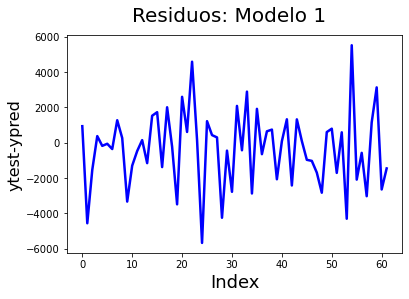

In [42]:
c = [i for i in range(len(y_pred1))]
fig = plt.figure()
plt.plot(c,res1, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Residuos: Modelo 1', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

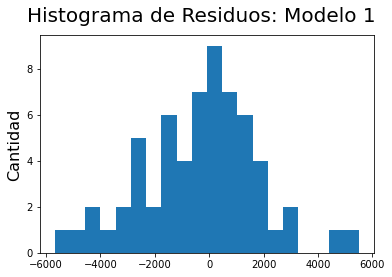

In [43]:
fig = plt.figure()
plt.hist(res1,bins=20)
fig.suptitle('Histograma de Residuos: Modelo 1', fontsize=20)                                    
plt.ylabel('Cantidad', fontsize=16)               
plt.show()

In [44]:
media_residuos1 = res1.mean()
print('La media de los residuos del modelo 1 es:',media_residuos1)

median_residuos1 = res1.median()
print('La mediana de los residuos del modelo 1 es:',median_residuos1)

La media de los residuos del modelo 1 es: -343.97852788531355
La mediana de los residuos del modelo 1 es: -126.10563840953728


In [45]:
res1.describe() #analizo los residuos

count      62.000000
mean     -343.978528
std      2162.110119
min     -5681.001714
25%     -1659.972490
50%      -126.105638
75%       894.135199
max      5512.918942
dtype: float64

Observamos que existe un rango amplio entre los valores de los residuos [-5681 a 5512] , con una media que es lejana a 0, lo cual implica problemas en la predicción

#### Test de Heterocedasticidad

In [46]:
# Test de Breusch Pagan 
from statsmodels.compat import lzip
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(lm1.resid, lm1.model.exog)
print('Modelo 1')
lzip(name, test)

Modelo 1


[('Lagrange multiplier statistic', 53.42740465978418),
 ('p-value', 0.9878765079454525),
 ('f-value', 0.792034508389407),
 ('f p-value', 0.829311124675038)]

In [48]:
#Test de Shapiro para chequear normalidad en los residuos
stat, p = shapiro(res1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('No rechazo H0')
else:
    print('Rechazo H0')

Statistics=0.989, p=0.833
No rechazo H0


In [49]:

# Test de Durbin-Watson para evaluar la presencia de autocorrelacion de los residuos
durbin_watson(lm1.resid)

1.9967128763499125

##### Gráficos Diagnósticos de supuestos Modelo 1

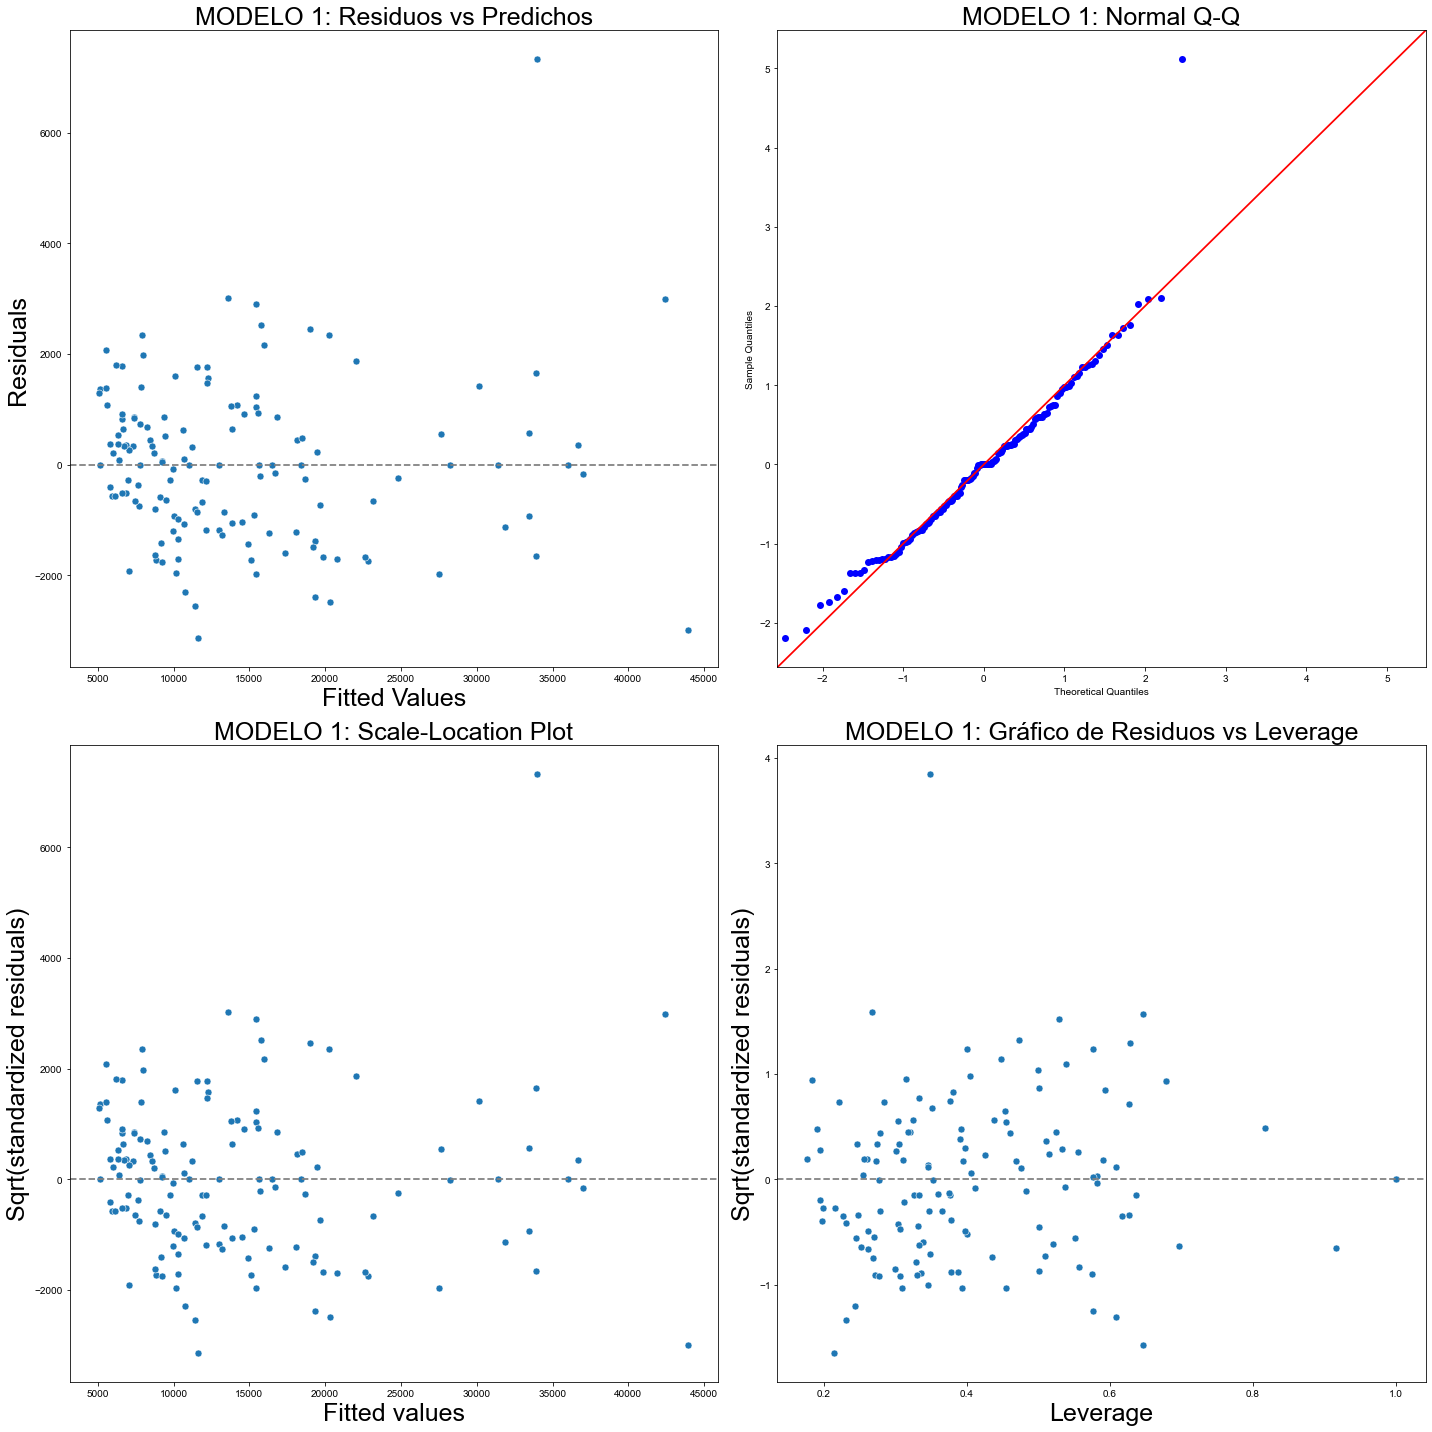

In [80]:
# Graficar los distintos plots diagnósticos
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots(nrows=2, ncols=2)
  
plt.style.use('seaborn')
  
# Gráfico de Residuos vs Predichos
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values',fontsize=25)
ax[0, 0].set_ylabel('Residuals',fontsize=25)
ax[0, 0].set_title('MODELO 1: Residuos vs Predichos',fontsize=25)
  
# Gráfico Q-Q plot para evaluar normalidad
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('MODELO 1: Normal Q-Q',fontsize=25)
  
#Gráfico de Scale-Location 
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Fitted values',fontsize=25)
ax[1, 0].set_ylabel('Sqrt(standardized residuals)',fontsize=25)
ax[1, 0].set_title('MODELO 1: Scale-Location Plot',fontsize=25)
  
# Gráfico de Residuos  vs Leverage 
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 1])
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 1].set_xlabel('Leverage',fontsize=25)
ax[1, 1].set_ylabel('Sqrt(standardized residuals)',fontsize=25)
ax[1, 1].set_title('MODELO 1: Gráfico de Residuos vs Leverage',fontsize=25)
  
  
plt.tight_layout()
plt.show()
  


La evaluación de los supuestos muestra: 

-De acuerdo al test de Shapiro no podemos rechazar la hipótesis de que los residuos tienen distribución normal. Esto se condice con la forma del histograma.
-El gráfico de residuos vs fitted  muestra que se cumple el supuesto de homocedasticidad ( no impresiona que los residuos tengan estructura). Esto se confirma según el test de Breusch Pagan que no puede rechazar la hipótesis nula de homocedasticidad de los residuos 
-Un valor de test de DW cercano a 2 lo cual implica que no existiría autocorrelación de los residuos , también lo observamos en el gráfico previo ( Residuo vs Index). En este mismo gráfico se verifica que no existen tendencia ni estructura especial de los residuos. 
Con lo cual se cumplen los supuestos para utilizar el modelo de regresión lineal 


### Modelo de Regresión 2

En este modelo vamos a seleccionar sólo aquellas variables más relevantes para la predicción del precio del automovil usando RFE. Incluiremos en el modelo las 20 variables más importantes

In [50]:
#RFE 
from sklearn.feature_selection import RFE

# Seleccionamos las 20 variables más relevantes
lm2 = LinearRegression(fit_intercept=False)
rfe_20 = RFE(lm2, 20)

# Hacemos  un fit con 20 variables
rfe_20.fit(x_train, y_train)

# Identificamos aquellas relevantes
print(rfe_20.support_)           
print(rfe_20.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True False  True  True  True  True  True  True  True  True False False
  True False False False False False  True False  True False False False
 False False False  True False False False False False False False  True
  True False False False False  True False False False False False False
 False False  True False False False False]
[52 55  9 53 58 54 42 46 18 56 60 57 59  2  3  4  6  7  5 34 17  1  1  1
  1 51  1  1  1  1  1  1  1  1 35 47  1 11 48 43 20 15  1 10  1 13 21 25
 41 38 28  1 31 22 26 16 27 44 45  1  1 40 36 29 50  1 32 14 30 39 24 37
 19 12  1 23 33  8 49]


In [51]:
# Realizamos las predicciones 
y_pred2 = rfe_20.predict(x_test)

# Calculamos el MSE y el R2 en test
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred2))
# R2
print("R2: %.2f" % r2_score(y_test, y_pred2))

Mean squared error: 9899175.76
R2: 0.70


Al incluir 20 variables en el modelo, observamos una disminución del R2 en relación al modelo 1 ( 0.86)
También aumenta el EMS

In [52]:
# Seleccionamos las 20 variables más importantes
col_20 = x_train.columns[rfe_20.support_]

# Construimos un dataset que solo incluya dichas variables
x_train_rfe_20 = x_train[col_20]


Observamos que para este segundo modelo, tanto el R2 como el R2-ajustado disminuyero su valor.

In [53]:

# Corremos el modelo que incluye las 20 variables más explicativas y analizamos sus métricas
lm_20 = sm.OLS(y_train, sm.add_constant(x_train_rfe_20)).fit()   
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     65.22
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.12e-53
Time:                        22:30:16   Log-Likelihood:                -1334.2
No. Observations:                 143   AIC:                             2704.
Df Residuals:                     125   BIC:                             2758.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.582e+04 

En el summary del modelo vemos que el valor del coeficiente de determinación R 2 del modelo en train es  0.899 
mientras que el R2 ajustado es 0.885
Esto es que el 88.5% del precio de los automóviles esta explicado por las variables incluídas en el modelo
De acuerdo a sus coeficientes , todas las variables incluidas se asocian  con el outcome en forma independiente
excepto enginetype_dohcv ( p 0.166) 


In [54]:
# Mean Squared Error (MSE)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred2))
# R2
print("R2: %.2f" % r2_score(y_test, y_pred2))

Mean squared error: 9899175.76
R2: 0.70


El modelo 2 muestra disminución del R2 y R2 ajustado en relación al modelo 1 tanto en el dataset de entrenamiento como en test
Al mismo tiempo , se nota aumento del EMS 

### Evaluación de supuestos del modelo 2

In [56]:
#Chequeamos los supuestos del modelo 2, para lo cual generamos los residuos
res2 = y_test - y_pred2
res2


88       533.048442
72    -11491.118178
114     -564.688229
158     -847.951558
163    -4385.481515
           ...     
133    -3124.126366
166    -1874.545799
41      4199.048442
180    -3743.857437
90      -695.035122
Name: price, Length: 62, dtype: float64

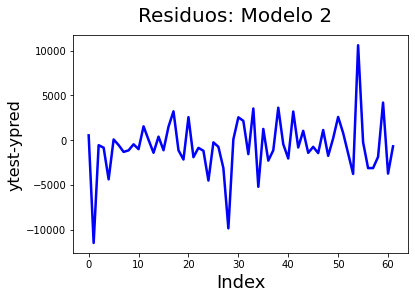

In [57]:
c = [i for i in range(len(y_pred2))]
fig = plt.figure()
plt.plot(c,res2, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Residuos: Modelo 2', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

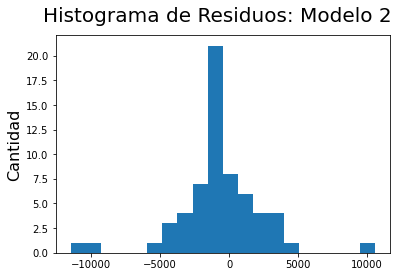

In [58]:
fig = plt.figure()
plt.hist(res2,bins=20)
fig.suptitle('Histograma de Residuos: Modelo 2', fontsize=20)                                    
plt.ylabel('Cantidad', fontsize=16)               
plt.show()

In [59]:
media_residuos2 = res2.mean()
print('La media de los residuos del modelo 2 es:',media_residuos2)

median_residuos2 = res2.median()
print('La mediana de los residuos del modelo 2 es:',median_residuos2)

La media de los residuos del modelo 2 es: -649.7126367144008
La mediana de los residuos del modelo 2 es: -785.1559097055888


In [60]:
res2.describe()

count       62.000000
mean      -649.712637
std       3103.612526
min     -11491.118178
25%      -1709.738520
50%       -785.155910
75%        735.548442
max      10605.454201
Name: price, dtype: float64

Observamos que existe un rango amplio entre los valores de los residuos [-11491 a 10605] 
Estas diferencias son mayores a las que observamos en el modelo 1

In [61]:
# Test de Breusch Pagan 
from statsmodels.compat import lzip
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(lm_20.resid, lm_20.model.exog)
print('Modelo 2')
lzip(name, test)

Modelo 2


[('Lagrange multiplier statistic', 59.82949254484276),
 ('p-value', 7.5676381646882415e-06),
 ('f-value', 5.2894079014427815),
 ('f p-value', 1.1522133167804612e-08)]

In [62]:
#Test de Shapiro para chequear normalidad en los residuos
stat, p = shapiro(res2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('No rechazo H0')
else:
    print('Rechazo H0')

Statistics=0.901, p=0.000
Rechazo H0


In [63]:
# Durbin-Watson test
durbin_watson(lm_20.resid)

1.706762240119491

##### Gráficos Diagnósticos de supuestos Modelo 2

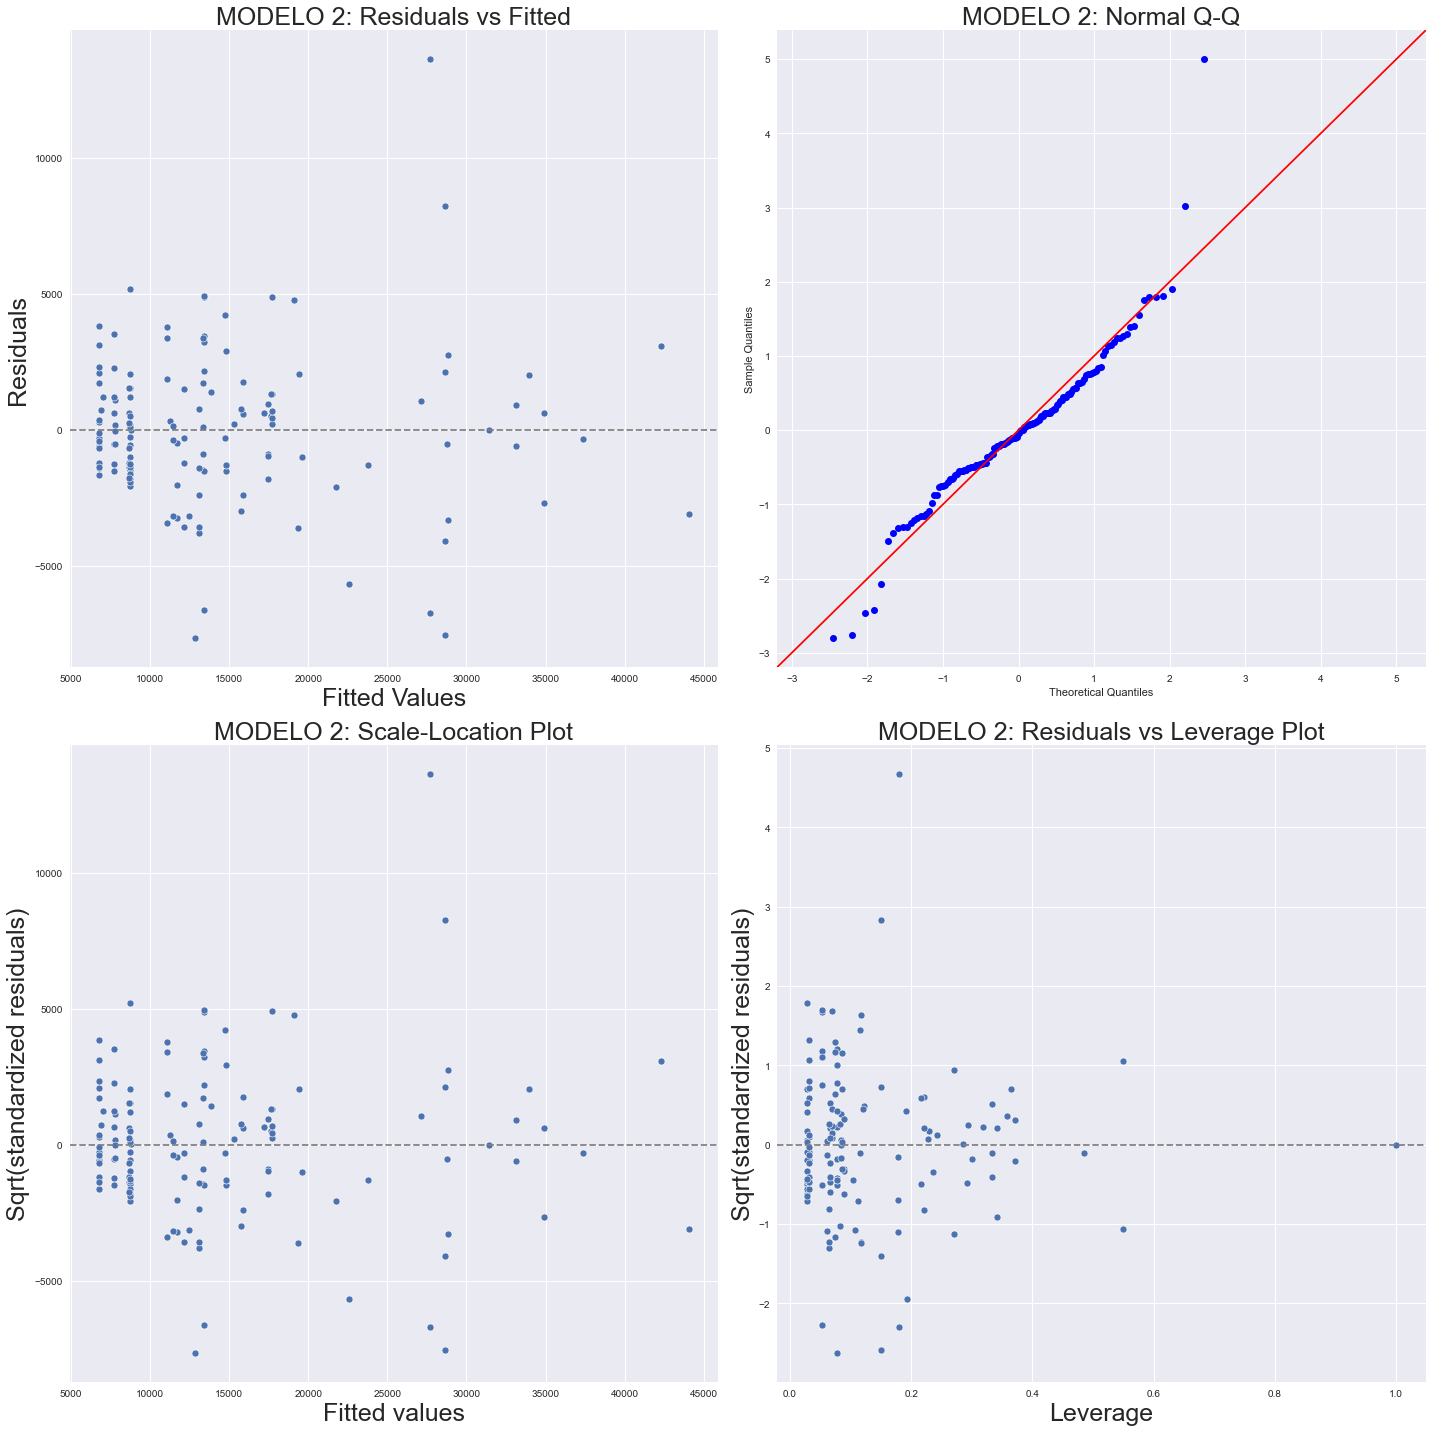

In [83]:
# Graficar los distintos plots diagnósticos
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots(nrows=2, ncols=2)
  
plt.style.use('seaborn')
  
# Gráfico de Residuos vs Predichos
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values',fontsize=25)
ax[0, 0].set_ylabel('Residuals',fontsize=25)
ax[0, 0].set_title('MODELO 2: Residuals vs Fitted',fontsize=25)
  
# Gráfico Q-Q plot para evaluar normalidad
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('MODELO 2: Normal Q-Q',fontsize=25)
  
# Gráfico de Scale-Location
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Fitted values',fontsize=25)
ax[1, 0].set_ylabel('Sqrt(standardized residuals)',fontsize=25)
ax[1, 0].set_title('MODELO 2: Scale-Location Plot',fontsize=25)
  
# Gráfico de Residuos  vs Leverage 
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 1])
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 1].set_xlabel('Leverage',fontsize=25)
ax[1, 1].set_ylabel('Sqrt(standardized residuals)',fontsize=25)
ax[1, 1].set_title('MODELO 2: Residuals vs Leverage Plot',fontsize=25)
  
  
plt.tight_layout()
plt.show()
  

De las pruebas realizadas ,  podemos ver que en este modelo los residuos no tienen distribución normal de acuerdo a histograma y a Test de Shapiro.
Dado que el test de DW presenta un valor entre  1.5 y 2.5, no se considera la autocorrelación como problemática en este modelo, pero de todas formas su valor es menor a 2.
En el gráfico ( residuals vs fitted) observamos que los residuos impresionan tener estructura con menor varianza en valores más bajos, lo cual se confirma con el test de Breusch Pagan, que permite rechazar la hipotesis nula de homocedasticidad
De acuerdo a esto no se cumplen los supuestos necesarios para utilizar el modelo. Como solución podrái plantearse el uso de  Cuadrados mınimos ponderados  o Transformaciones que eliminen la heterocedasticidad como Box & Cox para la variable price.



### Modelo de Regresión  3

En este modelo , buscaremos el número óptimo de variables mediante RFE

In [64]:
n_variables_list = list(range(4, 79)) #Cantidad de variables
adjusted_r2 = []
r2 = []
test_r2 = []

for n_vars in range(4, 79):

    # RFE con n variables
    lm = LinearRegression(fit_intercept=False)

    # Especificamos el número de variables 
    rfe_n = RFE(lm, n_vars)

    # Realizamos el fit con n variables
    rfe_n.fit(x_train, y_train)

    #  Columnas seleccionadas 
    col_n = x_train.columns[rfe_n.support_]

    #  Realizamos un subset con las columnas seleccionadas (variables)
    x_train_rfe_n = x_train[col_n]

    # Se realiza el fit con n variables
    lm_n = sm.OLS(y_train, x_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    
    # Construimos un subset con las mismas cols del dataset test 
    x_test_rfe_n = x_test[col_n]


    # Realizo las predicciones
    y_pred = lm_n.predict(x_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))

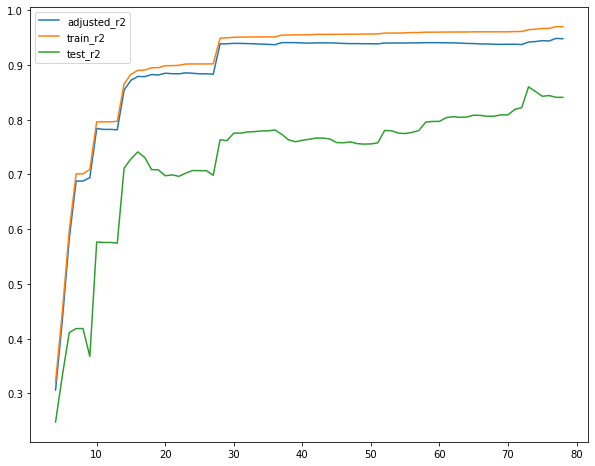

In [65]:
# Graficamos el valor de R2 ajustado en relación al número de variables incluídas
plt.figure(figsize=(10, 8))
plt.plot(n_variables_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_variables_list, r2, label="train_r2")
plt.plot(n_variables_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

De acuerdo con la figura , el número de variables que alcanza el mayor valor de R2 en test es cercano a 72. Sin embargo teniendo en cuenta el principio de parsimonia , consideramos que a partir de 15 variables no aumenta en forma significativa la performance del modelo en testing. Ante esto proponemos construir un modelo que incluya las 15 variables más importantes.

### Construcción del  Modelo 3

In [66]:
# RFE con 15 variables
lm = LinearRegression(fit_intercept=False)

rfe_n = RFE(lm, 15) 

# Fit
rfe_n.fit(x_train, y_train)

# Selección de las columnas que se incluirán en el modelo
col_n = x_train.columns[rfe_n.support_]

# Construcción del subset con las 15 variables
x_train_rfe_n = x_train[col_n]


# Fit del modelo
lm_3 = sm.OLS(y_train, x_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)


# Subset del test set
x_test_rfe_n = x_test[col_n]


# Predicciones
y_pred3 = lm_3.predict(x_test_rfe_n)

test_r2.append(r2_score(y_test, y_pred3))

In [67]:

# Summary del modelo final 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     81.70
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.85e-54
Time:                        22:30:28   Log-Likelihood:                -1344.5
No. Observations:                 143   AIC:                             2715.
Df Residuals:                     130   BIC:                             2754.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
aspiration_std        1.039e+04    745.224     13.936      0.000    8910.963    1.19e+04
aspiration_turbo      1.513e+04    855.789     17.677      0.000    1.34e+04    1.68e+04
doornumber_four       1.348e+04    803.915     16.768      0.000    1.19e+04    1.51e+04
doornumber_two        1.203e+04    738.941     16.284      0.000    1.06e+04    1.35e+04
drivewheel_4wd        6571.5109   1266.197      5.190      0.000    4066.492    9076.530
drivewheel_fwd        6831.9119    727.684      9.389      0.000    5392.277    8271.547
drivewheel_rwd        1.211e+04    650.896     18.604      0.000    1.08e+04    1.34e+04
enginelocation_front -1.566e+04   1953.315     -8.015      0.000   -1.95e+04   -1.18e+04
enginetype_dohcv     -1.106e+04   3775.182     -2.929      0.004   -1.85e+04   -3587.427
cylindernumber_eight  2.359e+04   2304.527     10.234      0.000     1.9e+04    2.81e+04
cylindernumber_four  -6592.4577    730.671     -9.022      0.000   -8038.003   -5146.912
fuelsystem_4bbl      -6726.4073   1953.315     -3.444      0.001   -1.06e+04   -2862.007
CarBrand_bmw          8539.9060   1357.725      6.290      0.000    5853.809    1.12e+04
CarBrand_jaguar       1.476e+04   1934.137      7.633      0.000    1.09e+04    1.86e+04
CarBrand_saab         6357.0739   1440.830      4.412      0.000    3506.565    9207.583
==============================================================================
Omnibus:                       24.360   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.313
Skew:                           0.591   Prob(JB):                     3.27e-16
Kurtosis:                       6.251   Cond. No.                     4.40e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.4e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

En el summary del modelo vemos que el valor del coeficiente de determinación R 2 del modelo en train es  0.883 
mientras que el R2 ajustado es 0.872
Esto es que el 87% del precio de los automóviles esta explicado por las variables incluídas en el modelo
De acuerdo a sus coeficientes , todas las variables incluidas se asocian  con el outcome en forma independiente
A continuación observamos que en test , el R2 aumento de 0.7 a 0.73 en relacion al modelo 2 y el EMS descendio de 989917576 a 8888116.58 con lo cual se ha mejorado al modelo.


In [68]:
# Mean Squared Error (MSE)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred3))
# R2
print("R2: %.2f" % r2_score(y_test, y_pred3))

Mean squared error: 8888116.58
R2: 0.73


### Evaluación de supuestos del modelo 3

In [70]:
#Chequeamos los supuestos del  modelo , para lo cual calculamos los residuos
res3 = y_test - y_pred3
res3

88      831.029612
72    -7400.673590
114   -1392.971044
158    -549.970388
163   -4220.949623
          ...     
133   -2635.044251
166   -2740.949623
41     4497.029612
180   -4628.060161
90       97.682431
Length: 62, dtype: float64

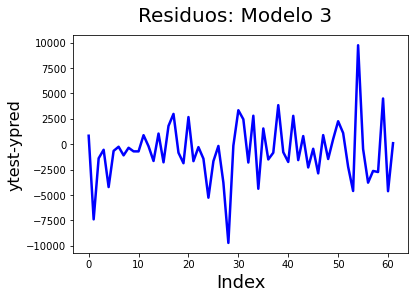

In [71]:
c = [i for i in range(len(y_pred3))]
fig = plt.figure()
plt.plot(c,res3, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Residuos: Modelo 3', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

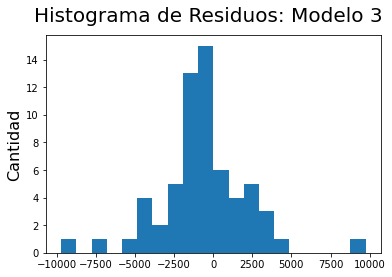

In [72]:
fig = plt.figure()
plt.hist(res3,bins=20)
fig.suptitle('Histograma de Residuos: Modelo 3', fontsize=20)                                    
plt.ylabel('Cantidad', fontsize=16)               
plt.show()

In [73]:
media_residuos3 = res3.mean()
print('La media de los residuos del modelo 3 es:',media_residuos3)

median_residuos3 = res3.median()
print('La mediana de los residuos del modelo 3 es:',median_residuos3)

La media de los residuos del modelo 3 es: -674.2178549711158
La mediana de los residuos del modelo 3 es: -708.1439784025333


In [74]:
res3.describe()

count      62.000000
mean     -674.217855
std      2927.763947
min     -9719.326410
25%     -1800.909719
50%      -708.143978
75%       871.742776
max      9739.050377
dtype: float64

Observamos que existe un rango amplio entre los valores de los residuos [-9719 a 9739] 
Estas diferencias son mayores a las que observamos en el modelo 1 pero mejores que el modelo 2

In [76]:
# Test de Breusch Pagan 
from statsmodels.compat import lzip
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(lm_3.resid, lm_3.model.exog)
print('Modelo 3')
lzip(name, test)

Modelo 3


[('Lagrange multiplier statistic', 54.73254030188374),
 ('p-value', 9.623296341290163e-07),
 ('f-value', 6.717490854481465),
 ('f p-value', 2.7074765563650684e-09)]

In [77]:
# Test de Shapiro para evaluar normalidad de los residuos
from scipy.stats import shapiro
stat, p = shapiro(res3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('No rechazo H0')
else:
    print('Rechazo H0')

Statistics=0.954, p=0.020
Rechazo H0


In [78]:
# Durbin-Watson test
durbin_watson(lm_3.resid)

1.5381652778520016

##### Gráficos Diagnósticos de supuestos Modelo 3

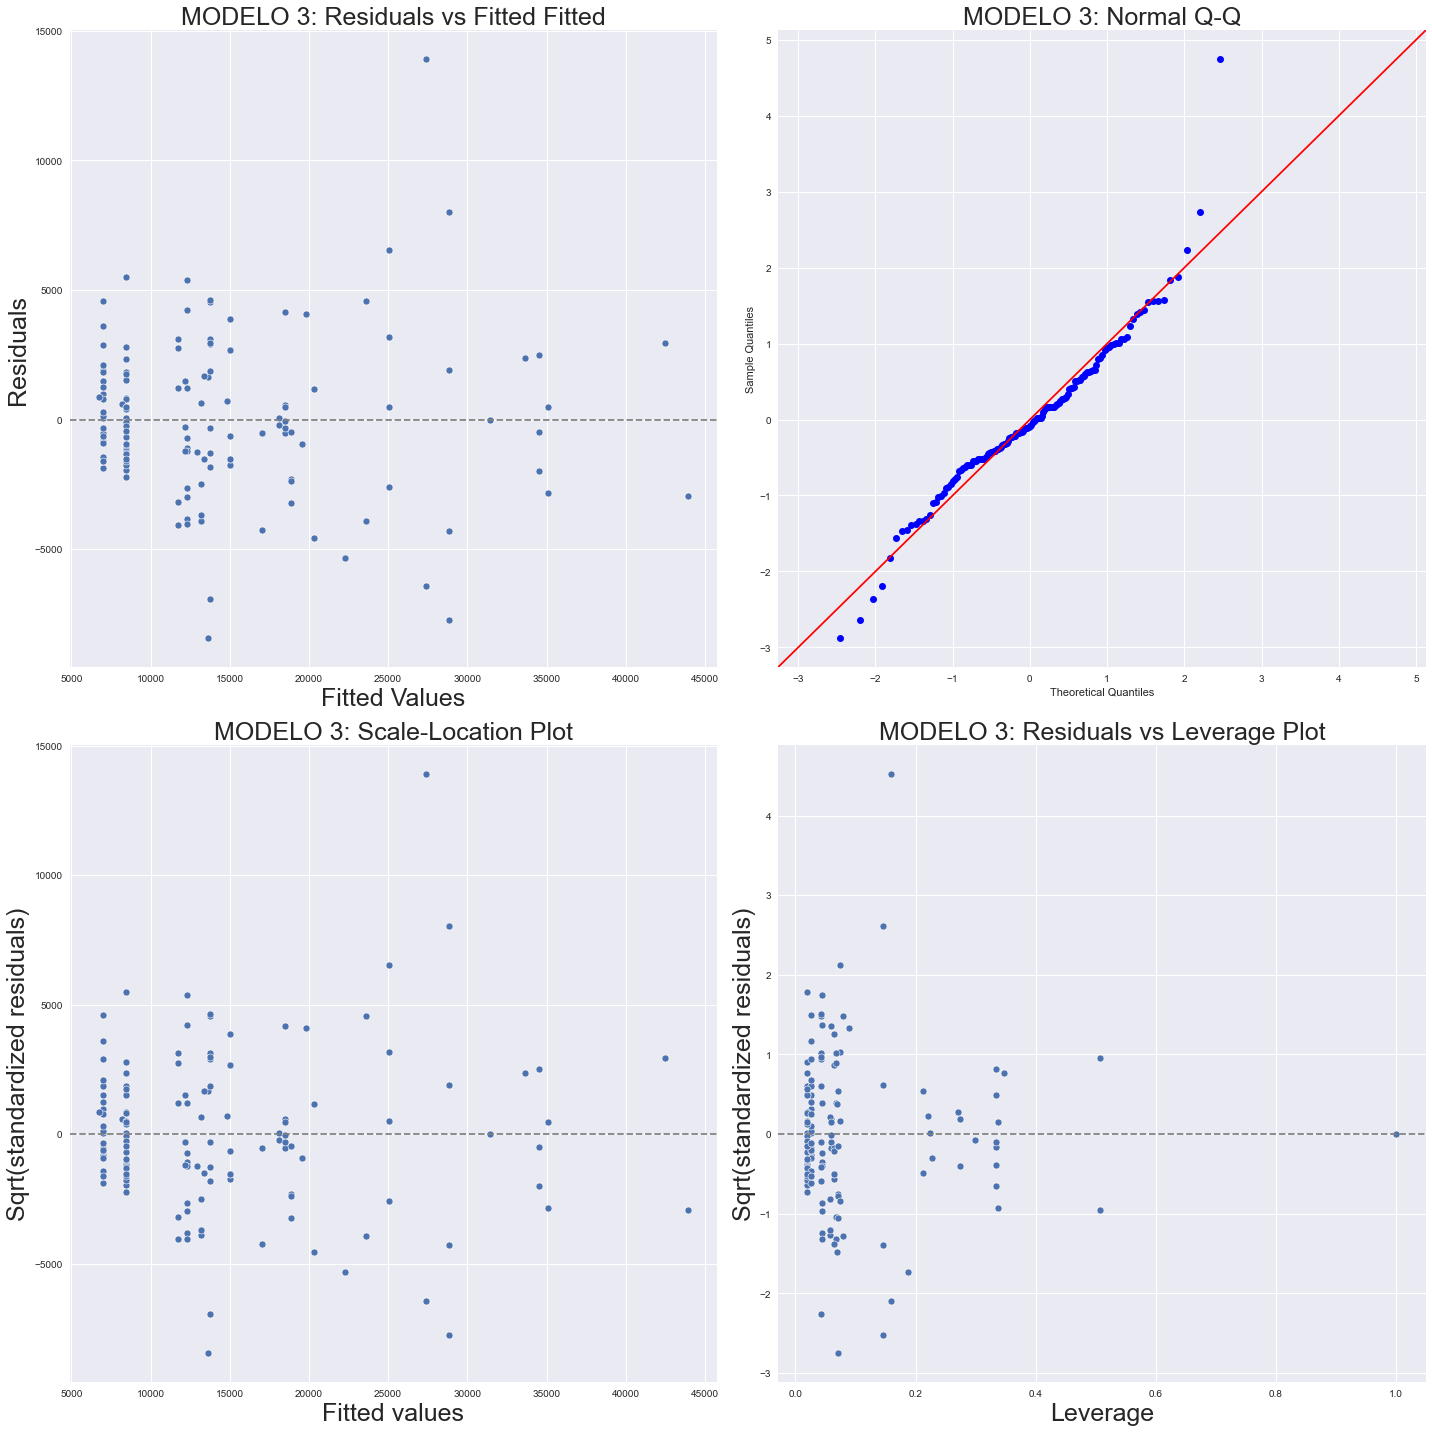

In [86]:
# Graficar los distintos plots diagnósticos
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots(nrows=2, ncols=2)
  
plt.style.use('seaborn')
  
# Gráfico de Residuos vs Predichos
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values',fontsize=25)
ax[0, 0].set_ylabel('Residuals',fontsize=25)
ax[0, 0].set_title('MODELO 3: Residuals vs Fitted Fitted',fontsize=25)
  
# Gráfico Q-Q plot para evaluar normalidad
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('MODELO 3: Normal Q-Q',fontsize=25)
  
# Gráfico de Scale-Location
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Fitted values',fontsize=25)
ax[1, 0].set_ylabel('Sqrt(standardized residuals)',fontsize=25)
ax[1, 0].set_title('MODELO 3: Scale-Location Plot',fontsize=25)
  
# Gráfico de Residuos  vs Leverage 
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 1])
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 1].set_xlabel('Leverage',fontsize=25)
ax[1, 1].set_ylabel('Sqrt(standardized residuals)',fontsize=25)
ax[1, 1].set_title('MODELO 3: Residuals vs Leverage Plot',fontsize=25)
  
  
plt.tight_layout()
plt.show()

Supuestos del modelo 3
Aunque de acuerdo al histograma, los residuos impresionan tener una distribución aproximadamente normal , el test de Shapiro , rechaza la normalidad de los residuos.
De acuerdo al valor del test de Durbin Watson , pensamos que existen problemas de autocorrelación.
En cuanto al gráfico de residuos vs valores predichos y residuos vs fitted vemos que muestra que existe cierta estructura. Por otro lado ,  el test de Breusch Pagan rechaza la hipótesis nula de homocedasticidad

De acuerdo a esto no se cumplen los supuestos necesarios para utilizar el modelo. Como solución podría plantearse el uso de  Cuadrados mınimos ponderados  o Transformaciones que eliminen la heterocedasticidad como Box & Cox para la variable price. También intentariamos esto para tratar la falta de normalidad de los residuos.




### 2.5. Chequeen puntos de influencia para los 3 modelos.


#### Marco teórico
Los outliers o valores atípicos son aquellos que se desvían del grueso del conjunto de datos. En general, tienen valores residuales altos, o sea la diferencia entre el valor observado y el predicho es mayor. Pueden o no ser puntos influyentes

Puntos de leverage : se define como una observación que tiene un valor de x que se aleja de la media de x.

Puntos de influencia: Una observación influyente se define como una observación que tiene una gran influencia en el ajuste del modelo. Un método para encontrar puntos influyentes es comparar el ajuste del modelo con y sin cada observación. 

Para evaluar en forma gráfica los puntos previos , utilizaremos los siguientes gráficos de diagnóstico:

Gráfico de residuos vs. ajuste: El residuo se puede calcular como: res = y_{observado} - y_{predicho} Este gráfico se utiliza para comprobar la linealidad y la homocedasticidad, si el modelo cumple la condición de relación lineal entonces debería tener una línea horizontal con mucha desviación. Si el modelo cumple la condición de homocedasticidad, el gráfico debería estar igualmente repartido alrededor de la línea y=0.

Gráfico Q-Q: se utiliza para comprobar la normalidad del conjunto de datos, si existe normalidad en el conjunto de datos entonces, los puntos de dispersión se distribuirán a lo largo de la línea discontinua de 45 grados.

Scale- Location plot : Es un gráfico del valor estandarizado con raíz cuadrada frente al valor predicho. Este gráfico se utiliza para comprobar la homocedasticidad de los residuos. Los residuos que se extienden por igual a través de la línea horizontal indican la homocedasticidad de los residuos.

Gráfico de residuos frente a leverage / Gráfico de distancia de Cook: El cuarto punto es el gráfico de distancia de Cook, que se utiliza para medir la influencia de los distintos puntos. El estadístico de distancia de Cook para cada observación mide el grado de cambio en las estimaciones del modelo cuando se omite esa observación en particular. El gráfico de distancia de Cook es la medida de distancia de Cook de cada observación, mientras que el gráfico de residuos frente a leverage es el gráfico entre los residuos estandarizados y los puntos de leverage.

### 2.5.1 Evaluación de  Puntos de influencia para el Modelo 1

In [79]:
results = lm1
# Variables para diagnóstico MODELO 1
residuals = results.resid #residuos
fitted_value = results.fittedvalues
stand_resids = results.resid_pearson #Residuos de Pearson
influence = results.get_influence() #Puntos de Influencia 
leverage = influence.hat_matrix_diag #Leverage
influence.summary_frame()

,dfb_const,dfb_wheelbase,dfb_carlength,dfb_carwidth,dfb_carheight,dfb_curbweight,dfb_enginesize,dfb_boreratio,dfb_stroke,dfb_compressionratio,...,dfb_CarBrand_subaru,dfb_CarBrand_toyota,dfb_CarBrand_volkswagen,dfb_CarBrand_volvo,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
128,-0.034478,-0.003577,0.041921,0.029415,0.013744,-0.069354,-0.005497,-0.018051,0.015380,0.028438,...,-0.035845,0.025196,-0.050249,0.019170,0.001502,0.288575,0.590607,0.346608,0.286936,0.344639
81,0.015067,0.040794,0.064677,-0.033401,-0.056037,-0.026872,-0.037502,0.031241,0.046740,-0.022630,...,0.001772,0.001697,-0.027478,0.022848,0.001908,0.489115,0.389499,0.390680,0.486806,0.388835
77,-0.027620,-0.014500,-0.004670,0.033654,0.011688,-0.019241,0.002852,-0.013604,0.003388,0.023944,...,0.013425,-0.008947,-0.028987,-0.010188,0.000231,0.228776,0.260608,0.135821,0.227433,0.135024
79,0.004310,-0.011196,0.001373,-0.003074,0.022938,-0.021760,0.005883,0.005342,-0.021347,0.005692,...,0.000970,-0.018331,0.005262,-0.015483,0.000418,0.226789,0.393869,0.182816,0.225456,0.181741
183,0.038113,0.017256,-0.017702,-0.068110,-0.017751,0.036349,-0.025198,-0.006860,0.000511,0.056076,...,0.028016,0.022459,-0.109278,0.020411,0.001374,-0.503035,0.302820,-0.331526,-0.500703,-0.329989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.031188,-0.010433,0.017490,-0.039578,-0.003904,-0.000840,-0.001299,0.003424,0.004952,0.017010,...,-0.008629,-0.008715,0.000952,0.007639,0.000104,-0.108960,0.411485,-0.091110,-0.108294,-0.090553
98,0.050586,0.131054,-0.038361,-0.019846,-0.085159,0.119481,-0.100756,-0.053252,0.061065,-0.109486,...,0.015052,-0.084659,-0.040505,-0.010523,0.003814,0.598343,0.460109,0.552366,0.595956,0.550163
66,0.492899,0.943079,-0.827141,-0.205153,-0.380625,0.442412,0.079093,-0.485104,0.472792,-0.548535,...,-0.069113,0.021586,0.097937,0.265602,0.069114,2.220391,0.528634,2.351407,2.277026,2.411385
126,-0.042209,-0.003207,0.037589,0.026375,0.012324,-0.062187,-0.004929,-0.016186,0.013791,0.025499,...,0.094725,0.019434,-0.046542,0.016052,0.003239,-0.626528,0.397652,-0.509059,-0.624163,-0.507137


In [ ]:
En la tabla previa observamos las distintas medidas para evaluar la influencia.
Ej la medida DFbeta muestra el  cambio sobre el coeficiente βj estimado si se omite la i-´esima observación en su estimación.
De acuerdo al número de registros de este modelo el valor critico es 0.26. 
Por otro lado observamos tambien la distancia de Cook, residuos estandarizados , residuos estudentizados.

Text(0.5, 1.0, 'Modelo 1: Distancia de Cook')

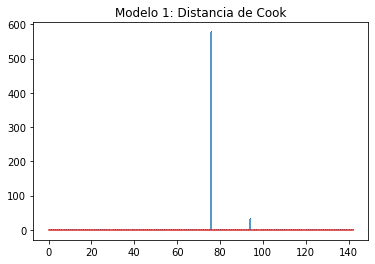

In [40]:
#Suprimimos la notación científica
np.set_printoptions(suppress=True)

#creamos una instancia de la influencia
influence = lm1.get_influence()

#c es la distancia y p es p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title('Modelo 1: Distancia de Cook')

Text(0.5, 1.0, 'Gráfico de valores influyentes')

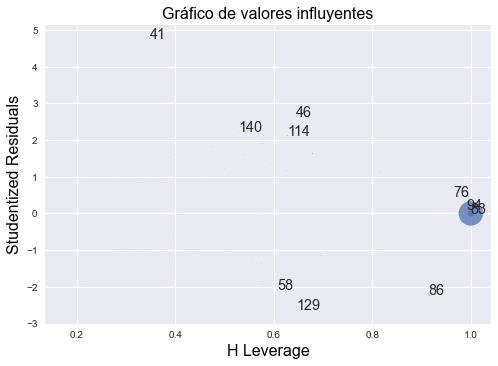

In [81]:
def _high_leverage(results):
    #TODO: reemplaza 1 con constante k
    return 2 * (results.df_model + 1)/results.nobs

infl = influence
fig, ax = plt.subplots(nrows=1, ncols=1)
psize = infl.cooks_distance[0]
leverage = infl.hat_matrix_diag
resids = infl.resid_studentized

from scipy import stats
from statsmodels.compat.python import lrange, lzip


cutoff = stats.t.ppf(1.-alpha/2, results.df_resid)
large_resid = np.abs(resids) > cutoff
large_leverage = leverage > _high_leverage(results)
large_points = np.logical_or(large_resid, large_leverage)

ax.scatter(leverage, resids, alpha=0.75,s=psize)

# Agregamos etiquetas a los puntos y configuramos el gráfico
labels = lrange(len(resids))
ax = utils.annotate_axes(np.where(large_points)[0], labels,
                             lzip(leverage, resids),
                             lzip(-(psize/2)**.5, (psize/2)**.5), "x-large",
                             ax)


font = {"fontsize": 16, "color": "black"}
ax.set_ylabel("Studentized Residuals", **font)
ax.set_xlabel("H Leverage", **font)
ax.set_title("Gráfico de valores influyentes", **font)

En este gráfico observamos que para el modelo 1 los registros 41 ( residuo estudentizado >3)
Los valores 76, 86, 94 y 83 son puntos de influencia por alto leverage.
Los restantes valores 140, 114 , 46 , 58 y 129 tienen residuos estudentizados elevados aunque no mayor a 3 o -3

### 2.5.2 Evaluación de  Puntos de influencia para el Modelo 2

In [82]:
results = lm_20
# Variables para diagnóstico MODELO 2
residuals = results.resid #Residuos
fitted_value = results.fittedvalues
stand_resids = results.resid_pearson #Residuos Pearson
influence = results.get_influence() #Puntos de Influencia 
leverage = influence.hat_matrix_diag #Leverage

Text(0.5, 1.0, 'Modelo 2: Distancia de Cook')

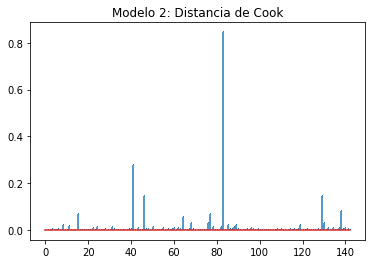

In [55]:
#Suprimo la notacion cientifica
np.set_printoptions(suppress=True)

#creo una instancia de la influencia
influence = lm_20.get_influence()

#c es la distancia and p es p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title('Modelo 2: Distancia de Cook')

Text(0.5, 1.0, 'Gráfico de valores influyentes')

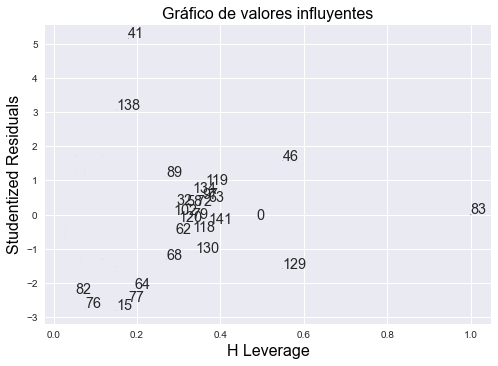

In [84]:
def _high_leverage(results):
    #TODO: reemplaza 1 con constante k
    return 2 * (results.df_model + 1)/results.nobs

infl = influence
fig, ax = plt.subplots(nrows=1, ncols=1)
psize = infl.cooks_distance[0]
leverage = infl.hat_matrix_diag
resids = infl.resid_studentized

from scipy import stats
from statsmodels.compat.python import lrange, lzip


cutoff = stats.t.ppf(1.-alpha/2, results.df_resid)
large_resid = np.abs(resids) > cutoff
large_leverage = leverage > _high_leverage(results)
large_points = np.logical_or(large_resid, large_leverage)

ax.scatter(leverage, resids, alpha=0.75,s=psize)

# Agregamos etiquetas a los puntos y configuramos el gráfico
labels = lrange(len(resids))
ax = utils.annotate_axes(np.where(large_points)[0], labels,
                             lzip(leverage, resids),
                             lzip(-(psize/2)**.5, (psize/2)**.5), "x-large",
                             ax)


font = {"fontsize": 16, "color": "black"}
ax.set_ylabel("Studentized Residuals", **font)
ax.set_xlabel("H Leverage", **font)
ax.set_title("Gráfico de valores influyentes", **font)


En este gráfico observamos que para el modelo 2 se detectan muchos puntos potencialmente influyentes.
Los registros 41 y 138 son puntos influyentes por presentar residuo estudentizado >3.  El punto 83 tiene alto leverage.
Los puntos 82, 76 15, 77 tiene residuo estudentizado alto , entre -2 y -3.


### 2.5.3 Evaluación de  Puntos de influencia para el Modelo 3

In [85]:
results = lm_3
# Variables para diagnóstico MODELO 3
residuals = results.resid #residuos
fitted_value = results.fittedvalues
stand_resids = results.resid_pearson #residuos de Pearson
influence = results.get_influence() #Puntos de Influencia 
leverage = influence.hat_matrix_diag #Leverage

Text(0.5, 1.0, 'Modelo 3: Distancia de Cook')

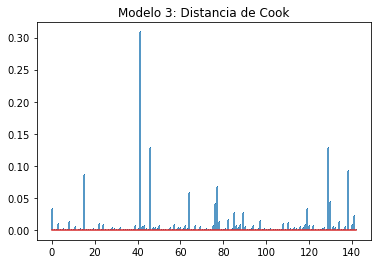

In [69]:
#Suprimo la notacion cientifica
np.set_printoptions(suppress=True)

#creo una instancia de la influencia
influence = lm_3.get_influence()

#c es la distancia and p es p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title('Modelo 3: Distancia de Cook')

Text(0.5, 1.0, 'Gráfico de Puntos Influyentes')

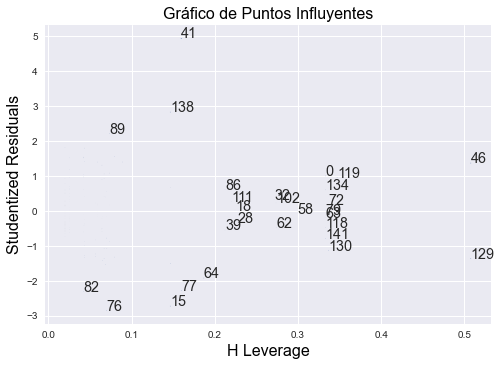

In [87]:
def _high_leverage(results):
    #Se reemplaza 1 con una constante K
    return 2 * (results.df_model + 1)/results.nobs

infl = influence
fig, ax = plt.subplots(nrows=1, ncols=1)
psize = infl.cooks_distance[0]
leverage = infl.hat_matrix_diag
resids = infl.resid_studentized

from scipy import stats
from statsmodels.compat.python import lrange, lzip


cutoff = stats.t.ppf(1.-alpha/2, results.df_resid)
large_resid = np.abs(resids) > cutoff
large_leverage = leverage > _high_leverage(results)
large_points = np.logical_or(large_resid, large_leverage)

ax.scatter(leverage, resids, alpha=0.75,s=psize)

# Agregamos etiquetas a los puntos y configuramos el gráfico
labels = lrange(len(resids))
ax = utils.annotate_axes(np.where(large_points)[0], labels,
                             lzip(leverage, resids),
                             lzip(-(psize/2)**.5, (psize/2)**.5), "x-large",
                             ax)


font = {"fontsize": 16, "color": "black"}
ax.set_ylabel("Studentized Residuals", **font)
ax.set_xlabel("H Leverage", **font)
ax.set_title("Gráfico de Puntos Influyentes", **font)

Al igual que en los modelos previos , en este gráfico observamos que para el registro 41 presenta residuo estudentizado >3
así como los registros 89 y 138. 
Los valores 46 y 129 son puntos de influencia por alto leverage.
Los restantes valores 82, 75 , 15 , 77  tienen residuos estudentizados elevados aunque no mayor a 3 o -3

## 2.6. Si encuentran puntos de influencia, Que podría plantear? Realice lo planteado.

En todos los modelos encontramos puntos influyentes ya listados

En estos casos , es necesario ajustar nuevos modelos sin estas observaciones

# CONCLUSIONES
## 2.7  Seleccione el mejor modelo y Justifique

 


En la siguiente tabla mostramos un resumen de las metricas de los 3 modelos 


	            Modelo 1	 Modelo 2	Modelo 3
EMS (test)   	4717642	     9899175	 88888116
R2 (train)	      0.972	     0.899        0.883
R2 ajust (train)  0.951      0.885	      0.872
R2 ajust (test)	  0.860	     0.700	      0.730
AIC (train)	      2608       2704	      2715
BIC (train)       2792	     2758	      2754
Cant. variables     79         20           15

En primer lugar debemos aclarar que los modelos 2 y 3 no cumplen con todos los supuestos de los residuos por lo cual deberiamos desestimarlos o probar transformaciones.
Si evaluamos solo los datos de la tabla , sin tener en cuenta lo mencionado , nuestras conclusiones serían las siguientes:   

Si bien el modelo 1 es el que tiene menor error medio cuadrado , mayor R2 y R2 ajustado ( las variables incluidas explican el 95% de la variable a predecir ) , no lo consideramos el mejor dado el numero de variables incluidas no cumple con el principio de parsimonia. Por otro lado muchas de las variables no presentan asociacion estadisticamente significativa con la variable dependiente.
Dado  que el modelo 3 es el mejor ya que presenta el menor numero de variables, con el criterio bayesiano más bajo y el AIC más elevado. Por otro lado , el R2 ajustado es aceptable y mejor que el del modelo 2 ( R2 test 0.70 vs 0.73).
























 

 



 
 